In [1]:
!pwd

/home/ainzartz/workspace/test


Data anallysis Sample based on Pandas

In [1]:
import pandas as pd

In [2]:
# Train import data form kagle Titanic
train_df = pd.read_csv('/home/ainzartz/workspace/test/train.csv')
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
type(train_df)


pandas.core.frame.DataFrame

In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.describe()

/home/ainzartz/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [7]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
print (train_df.Survived.count())
print (train_df.Age.count())

891
714


In [9]:
train_df2 = train_df.copy() 

In [10]:
#사용하지 않은 Feature 제거
train_df2 = train_df2.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin'],axis = 1)
train_df2.head(2)

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C


In [11]:
#Missing Value 제거
train_df2_nn = train_df2.dropna()
train_df2_nn.describe()

,PassengerId,Survived,Pclass,Age
count,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093
std,258.683191,0.491139,0.836854,14.492933
min,1.000000,0.000000,1.000000,0.420000
25%,222.750000,0.000000,1.000000,20.000000
50%,445.000000,0.000000,2.000000,28.000000
75%,677.250000,1.000000,3.000000,38.000000
max,891.000000,1.000000,3.000000,80.000000


In [12]:
#Age Type 변경 
train_df2_nn['Age'] = train_df2_nn['Age'].astype(int)
train_df2_nn.head()
train_df2_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Sex            712 non-null object
Age            712 non-null int64
Embarked       712 non-null object
dtypes: int64(4), object(2)
memory usage: 38.9+ KB


/home/ainzartz/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
train_df2_nn[train_df2_nn.Sex.str.contains('female')].count()
train_df2_nn[(train_df2_nn.Sex == 'female') & (train_df2_nn.Age <2) ]

,PassengerId,Survived,Pclass,Sex,Age,Embarked
172,173,1,3,female,1,S
381,382,1,3,female,1,C
469,470,1,3,female,0,C
644,645,1,3,female,0,C


데이타 시각화 

In [14]:
import matplotlib.pyplot as plt
#matplotlib inline

In [15]:
fig = plt.figure(figsize=(18,6),dpi=1600) 

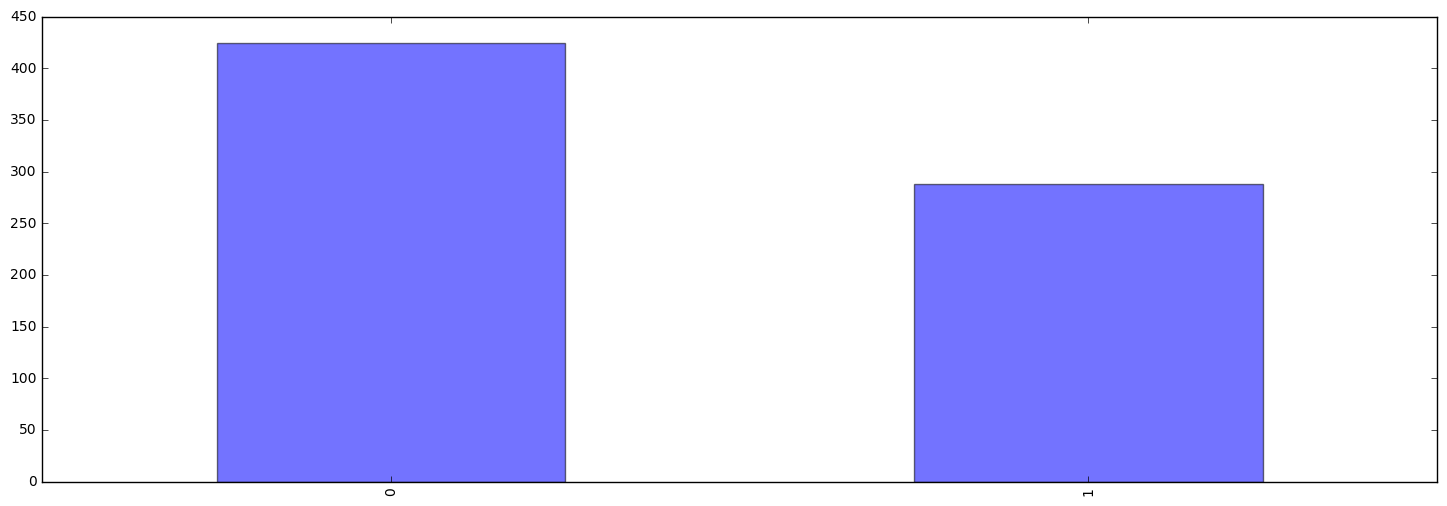

In [16]:
#생존자 /사망자수 
train_df2_nn.Survived.value_counts().plot(kind='bar',alpha = 0.55)
plt.show()

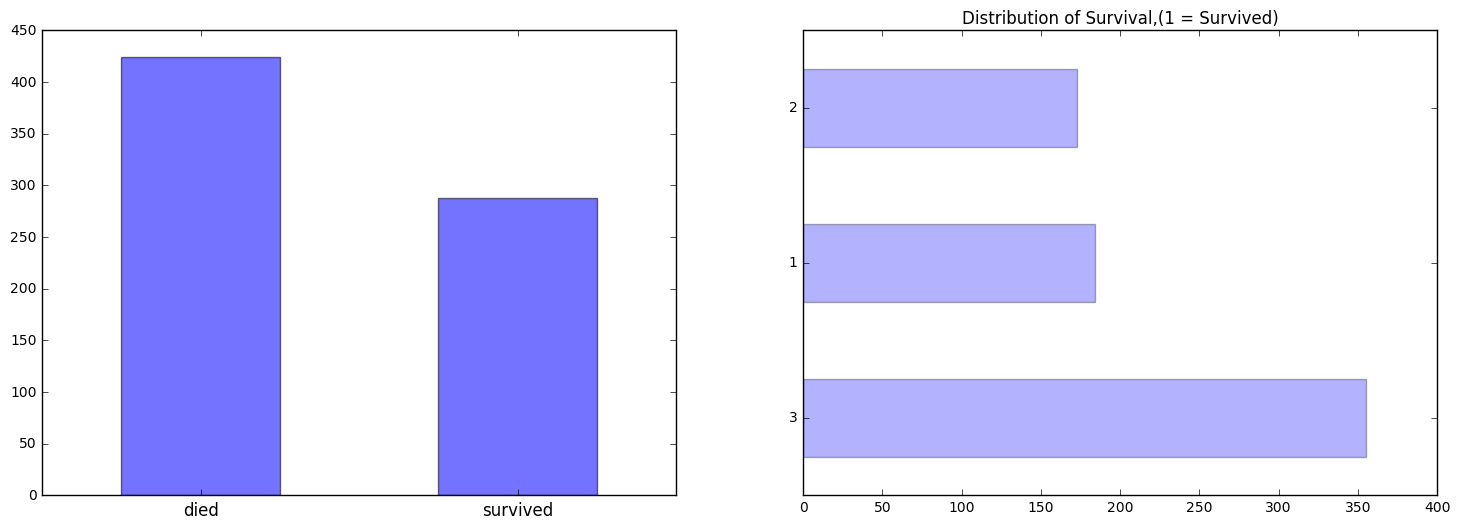

In [17]:
fig = plt.figure(figsize=(18,6),dpi=1600)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

train_df2_nn.Survived.value_counts().plot(kind='bar',alpha=0.55,ax=ax1)
plt.title('Distribution of Survival,(1 = Survived)')
ax1.set_xticklabels(["died","survived"],rotation=0,fontsize='large')

train_df2_nn.Pclass.value_counts().plot(kind='barh',alpha=0.3,ax=ax2)
plt.show()

In [ ]:
#좌석 등급내 나이 분포도 
fig = plt.figure(figsize=(18,6),dpi=1600)
train_df2_nn.Age[train_df2_nn.Pclass == 1].plot(kind='kde')
train_df2_nn.Age[train_df2_nn.Pclass == 2].plot(kind='kde')
train_df2_nn.Age[train_df2_nn.Pclass == 3].plot(kind='kde ')
plt.xlabel('Age')
plt.titme('Age Distributionwithin classes')
plt.legend(('last class','2nd Class', '3rd Class'),loc='best')
plt.show()

각 Feature 상관 관계 분석 

In [18]:
train_df2_nn.corr()

,PassengerId,Survived,Pclass,Age
PassengerId,1.000000,0.029526,-0.035609,0.033819
Survived,0.029526,1.000000,-0.356462,-0.082377
Pclass,-0.035609,-0.356462,1.000000,-0.366125
Age,0.033819,-0.082377,-0.366125,1.000000


In [22]:
train_df2_nn['Survived'].corr(train_df2_nn['Age'])

-0.082377077093748641

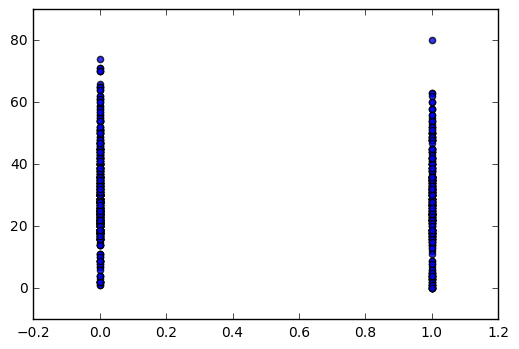

In [23]:

plt.scatter(train_df2_nn['Survived'],train_df2_nn['Age'],marker='o',alpha=0.8)
plt.show()

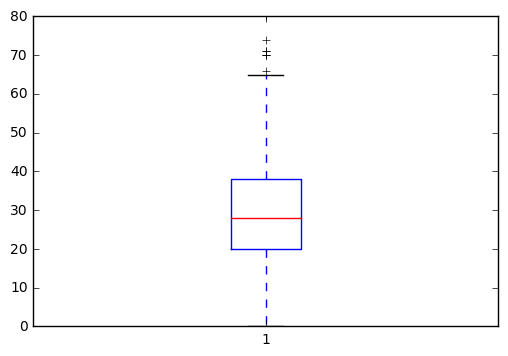

In [28]:
plt.boxplot(train_df2_nn['Age'])
plt.show()

        PassengerId  Survived   Age
Pclass                             
1             85405       120  7010
2             77358        83  5165
3            156633        85  8916
Int64Index([1, 2, 3], dtype='int64', name='Pclass')


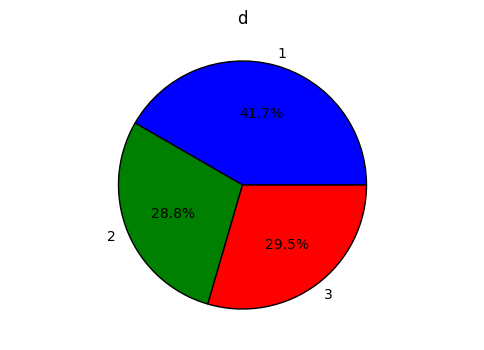

In [32]:
Pclass = train_df2_nn.groupby(['Pclass']).sum().stack()
temp = Pclass.unstack()
print(temp)
x_list = temp['Survived']
label_list = temp.index
print (label_list)
plt.axis('equal')
plt.pie(x_list,labels=label_list,autopct="%1.1f%%")
plt.title("d")
plt.show()